<a href="https://colab.research.google.com/github/ixfirdaus22/Product-Report/blob/main/SAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Generate simulated user data
np.random.seed(42)
n_users = 1000

data = {
    'user_id': range(1, n_users + 1),
    'age': np.random.randint(18, 60, n_users),
    'skill_level': np.random.randint(1, 11, n_users),
    'availability': np.random.choice(['weekdays', 'weekends', 'both'], n_users),
    'preferred_sport': np.random.choice(['football', 'cricket', 'basketball'], n_users),
    'matches_played': np.random.randint(0, 100, n_users),
    'win_rate': np.random.uniform(0, 1, n_users)
}

df = pd.DataFrame(data)


In [ ]:
# Simple EDA
print(df.head())
print(df.describe())

   user_id  age  skill_level availability preferred_sport  matches_played  \
0        1   56            4         both      basketball              50   
1        2   46            2     weekends         cricket              77   
2        3   32            3     weekdays         cricket              56   
3        4   25            3         both      basketball              46   
4        5   38            4     weekdays      basketball              99   

   win_rate  
0  0.395708  
1  0.715186  
2  0.281919  
3  0.363810  
4  0.190726  
           user_id          age  skill_level  matches_played     win_rate
count  1000.000000  1000.000000  1000.000000     1000.000000  1000.000000
mean    500.500000    38.745000     5.494000       49.675000     0.486993
std     288.819436    12.186734     2.920015       28.042285     0.287825
min       1.000000    18.000000     1.000000        0.000000     0.000187
25%     250.750000    28.000000     3.000000       26.000000     0.241951
50%     5

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

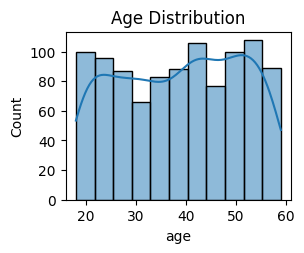

In [ ]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Skill Level Distribution')

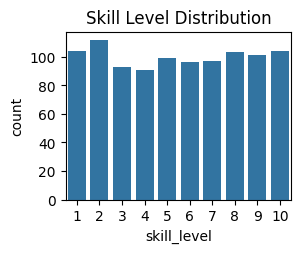

In [ ]:
# Skill level distribution
plt.subplot(2, 2, 2)
sns.countplot(x='skill_level', data=df)
plt.title('Skill Level Distribution')

Text(0.5, 1.0, 'Preferred Sport Distribution')

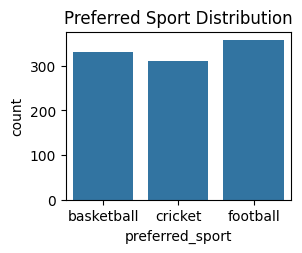

In [ ]:
# Preferred sport distribution
plt.subplot(2, 2, 3)
sns.countplot(x='preferred_sport', data=df)
plt.title('Preferred Sport Distribution')

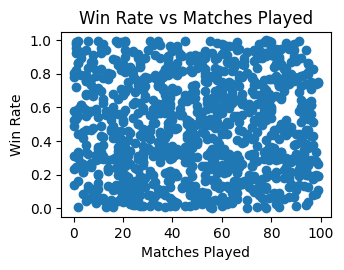

In [ ]:
# Win rate vs Matches played
plt.subplot(2, 2, 4)
plt.scatter(df['matches_played'], df['win_rate'])
plt.xlabel('Matches Played')
plt.ylabel('Win Rate')
plt.title('Win Rate vs Matches Played')

plt.tight_layout()
plt.show()

In [ ]:
# ML Modeling: K-means clustering for matchmaking
features = ['age', 'skill_level', 'matches_played', 'win_rate']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Find optimal number of clusters
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k = K[np.argmax(silhouette_scores)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
# Fit K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


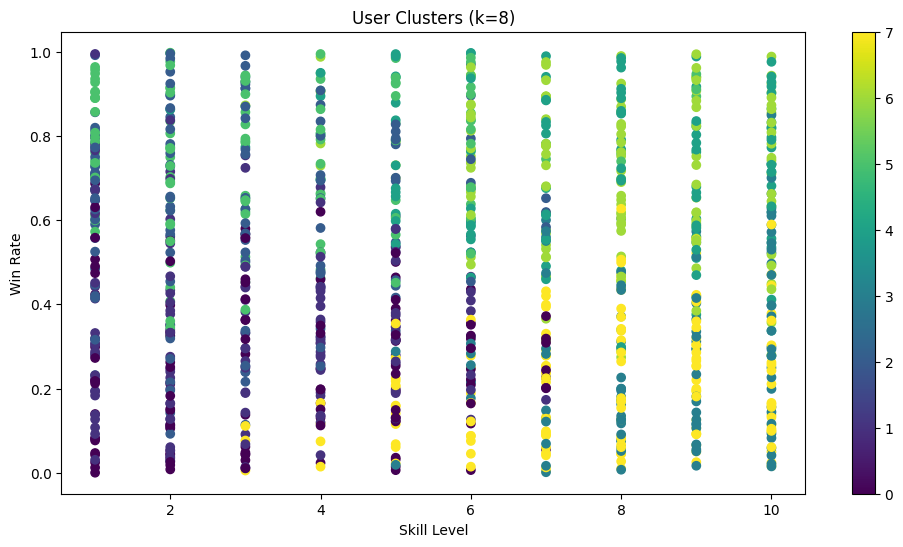

In [ ]:
# Visualization of clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['skill_level'], df['win_rate'], c=df['cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Skill Level')
plt.ylabel('Win Rate')
plt.title(f'User Clusters (k={optimal_k})')
plt.show()

In [ ]:
# Simple matchmaking function
def find_match(user_id, df, n_recommendations=5):
    user = df[df['user_id'] == user_id].iloc[0]
    user_cluster = user['cluster']

    # Find users in the same cluster with the same preferred sport
    potential_matches = df[(df['cluster'] == user_cluster) &
                           (df['preferred_sport'] == user['preferred_sport']) &
                           (df['user_id'] != user_id)]

    # Sort by similarity in skill level and return top n recommendations
    potential_matches['skill_diff'] = abs(potential_matches['skill_level'] - user['skill_level'])
    recommendations = potential_matches.sort_values('skill_diff').head(n_recommendations)

    return recommendations[['user_id', 'age', 'skill_level', 'availability']]

In [ ]:
 # Example usage
example_user_id = 42
print(f"\nMatch recommendations for user {example_user_id}:")
print(find_match(example_user_id, df))


Match recommendations for user 42:
     user_id  age  skill_level availability
273      274   58           10     weekdays
430      431   54           10     weekdays
590      591   45           10         both
973      974   50           10         both
171      172   41           10         both


<ipython-input-16-5c19ab43e1e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_matches['skill_diff'] = abs(potential_matches['skill_level'] - user['skill_level'])
